# 1. Import packages and Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
#Set full size of Data Table 
pd.set_option('display.max_columns', None)

In [4]:
# Add Data Path
data_file = "../project_1/data/SampleSuperstore.xls"

In [5]:
df_orders = pd.read_excel(data_file, sheet_name='Orders')
df_returns = pd.read_excel(data_file, sheet_name='Returns')
df_people = pd.read_excel(data_file, sheet_name='People')

# 2. Observe data 

In [6]:
df_orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
df_returns

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [8]:
df_people

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


# 3. Clean and Process Data 

### 3.1. Convert 'Order Date' dtype to Datetime

In [8]:
df_orders['Order Date'] = pd.to_datetime(df_orders['Order Date'])

### 3.2. Add 'Order Year' and 'Order Month' columns into dataframe

In [9]:
df_orders['Order Year'] = df_orders['Order Date'].dt.year
df_orders['Order Month'] = df_orders['Order Date'].dt.month

# 4. Analysis 

### 4.1. How have profits and sales changed over the years?


In [10]:
# Add 'Profit Rate' into dataframe
df_orders['Profit Rate'] = df_orders['Profit']/df_orders['Sales']

**Step 1: Group df_orders by 'Order Year' and Calculate total of Sales, Profit**

In [11]:
df_sale_profit_annual = df_orders.groupby('Order Year').sum()[['Sales', 'Profit']]

In [12]:
df_sale_profit_annual

,Sales,Profit
Order Year,,
2014,484247.4981,49543.9741
2015,470532.5090,61618.6037
2016,609205.5980,81795.1743
2017,733215.2552,93439.2696


**Step 2: Draw line chart**

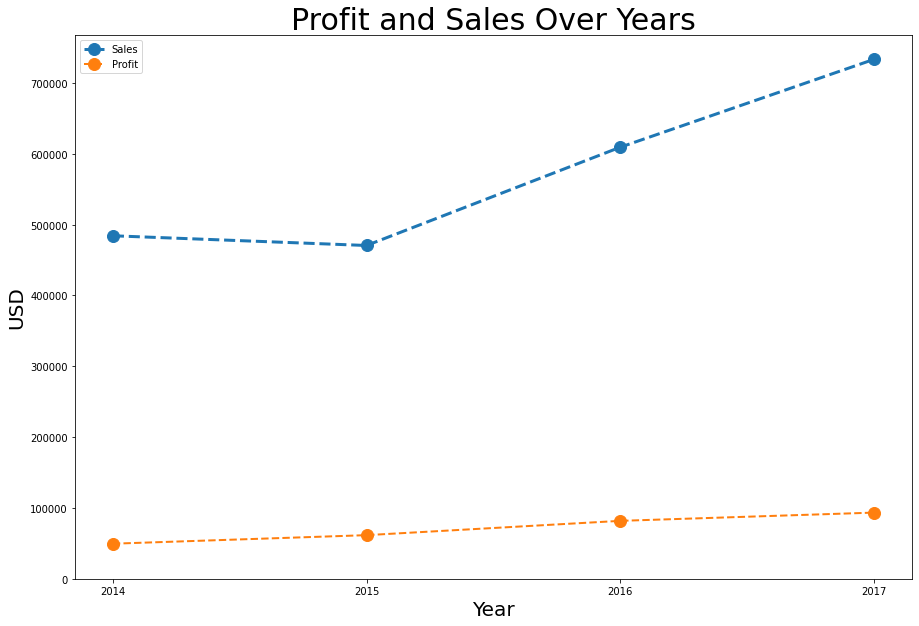

In [15]:
# Create line chart 
years = [str(year) for year, sales in df_sale_profit_annual['Sales'].items()]
plt.figure(figsize=(15,10))
plt.plot(years, df_sale_profit_annual['Sales'], marker='o', markersize=12,linewidth=3, linestyle='dashed', label = "Sales")
plt.plot(years, df_sale_profit_annual['Profit'], marker='o', markersize=12,linewidth=2, linestyle='dashed', label = "Profit")
plt.xlabel("Year", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.ylim(ymin=0)
plt.title("Profit and Sales Over Years", fontsize=30)
plt.legend()
plt.savefig('../project_1/images/{}.png'.format(' Sales and Profit By Month Over Year'), dpi=300, bbox_inches='tight')
plt.show()

### 4.2 How do profit Rate (Profit/Sales) over years?

**Step 1: Add 'Profit Rate' into df_sale_profit_annual dataframe**

In [27]:
df_sale_profit_annual['Profit Rate'] = round(df_sale_profit_annual['Profit']/df_sale_profit_annual['Sales'], 3)

In [28]:
df_sale_profit_annual

,Sales,Profit,Profit Rate
Order Year,,,
2014,484247.4981,49543.9741,0.102
2015,470532.5090,61618.6037,0.131
2016,609205.5980,81795.1743,0.134
2017,733215.2552,93439.2696,0.127


**Step 2: Draw line chart**

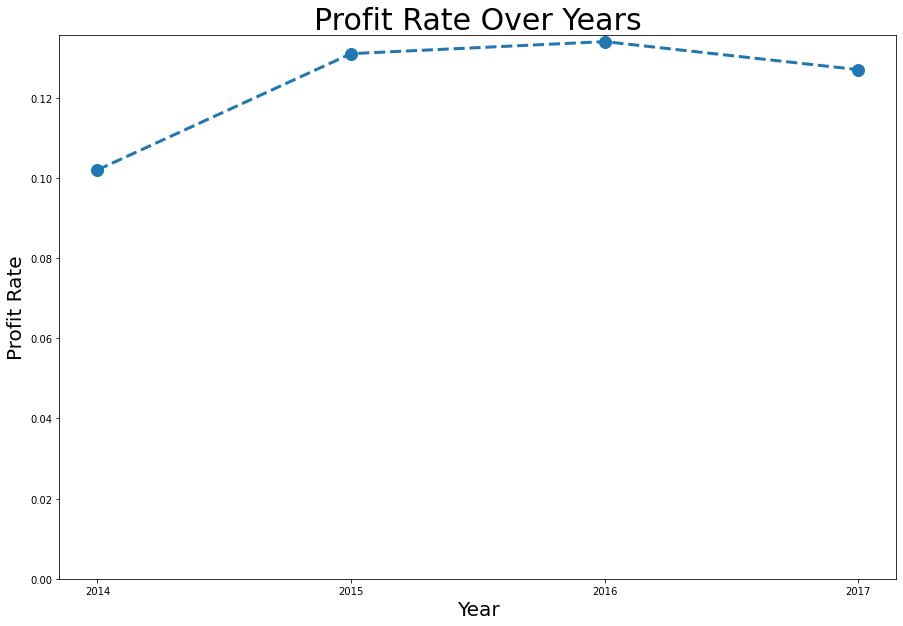

In [204]:
# Create line chart 
years = [str(year) for year, sales in df_sale_profit_annual['Sales'].items()]
plt.figure(figsize=(15, 10))
plt.plot(years, df_sale_profit_annual['Profit Rate'], marker='o', markersize=12,linewidth=3, linestyle='dashed')
plt.xlabel("Year", fontsize=20)
plt.ylabel("Profit Rate", fontsize=20)
plt.ylim(ymin=0)
plt.title("Profit Rate Over Years", fontsize=30)
plt.savefig('../project_1/images/{}.png'.format('Profit Rate Over Years'), dpi=300, bbox_inches='tight')
plt.show()

### 4.3. How do profits and sales change over months in 2017?
#### Look at above chart, I see a sudden drop in profits from 2016 - 2017. I choose 2017 for analyzing change Profit and Sales over months. 

**Step 1: Group dataframe by 'Order Year', 'Order Month' and Calculate Total of Profit, Sales**

In [43]:
df_profit_sale_monthly = df_orders.groupby(['Order Year', 'Order Month']).sum()[['Sales', 'Profit']]

**Step 2: Add 'Profit Rate' into df_profit_sale_monthly**

In [51]:
df_profit_sale_monthly['Profit Rate'] = round(df_profit_sale_monthly['Profit']/df_profit_sale_monthly['Sales'], 3)

In [212]:
df_profit_sale_monthly.tail(12)

Sales      Profit  Profit Rate
Order Year Order Month                                      
2017       1             43971.3740   7140.4391        0.162
           2             20301.1334   1613.8720        0.079
           3             58872.3528  14751.8915        0.251
           4             36521.5361    933.2900        0.026
           5             44261.1102   6342.5828        0.143
           6             52981.7257   8223.3357        0.155
           7             45264.4160   6952.6212        0.154
           8             63120.8880   9040.9557        0.143
           9             87866.6520  10991.5556        0.125
           10            77776.9232   9275.2755        0.119
           11           118447.8250   9690.1037        0.082
           12            83829.3188   8483.3468        0.101

**Step 3: Draw line chart Profit-Sales 2017**

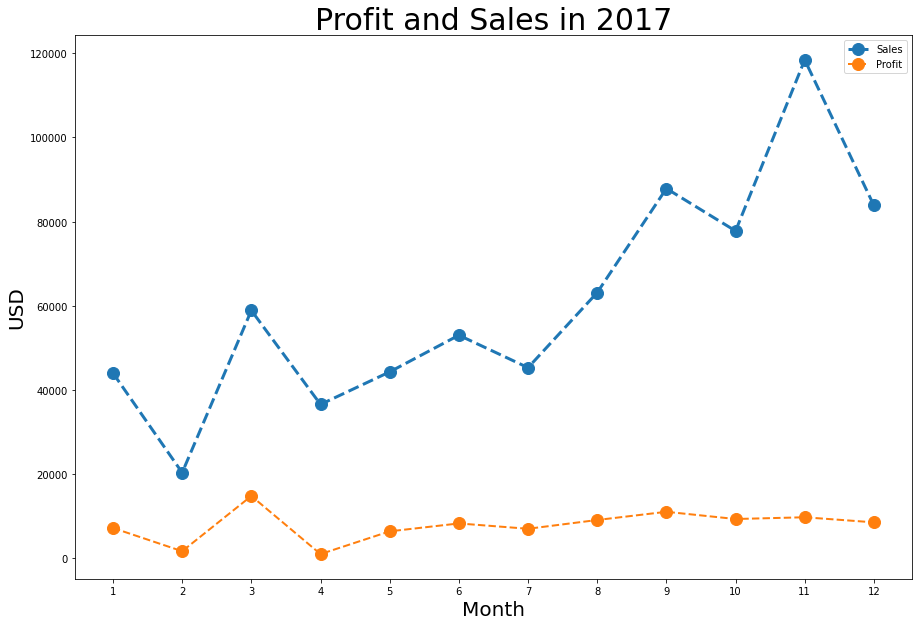

In [214]:
# Create bar chart 
months = df_profit_sale_monthly.index.get_level_values('Order Month').unique().astype(str)
plt.figure(figsize=(15,10))
plt.plot(months, df_profit_sale_monthly[df_profit_sale_monthly.index.get_level_values('Order Year')==2017]['Sales'], 
         marker='o', markersize=12,linewidth=3, linestyle='dashed', label = "Sales")
plt.plot(months, df_profit_sale_monthly[df_profit_sale_monthly.index.get_level_values('Order Year')==2017]['Profit'], 
         marker='o', markersize=12,linewidth=2, linestyle='dashed', label = "Profit")
plt.xlabel("Month", fontsize=20)
plt.ylabel("USD", fontsize=20)
#plt.ylim(ymin=0)
plt.title("Profit and Sales in 2017", fontsize=30)
plt.savefig('../project_1/images/{}.png'.format('Profit and Sales in 2017'), dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

**Step 4: Draw line chart Profit Rate 2017**

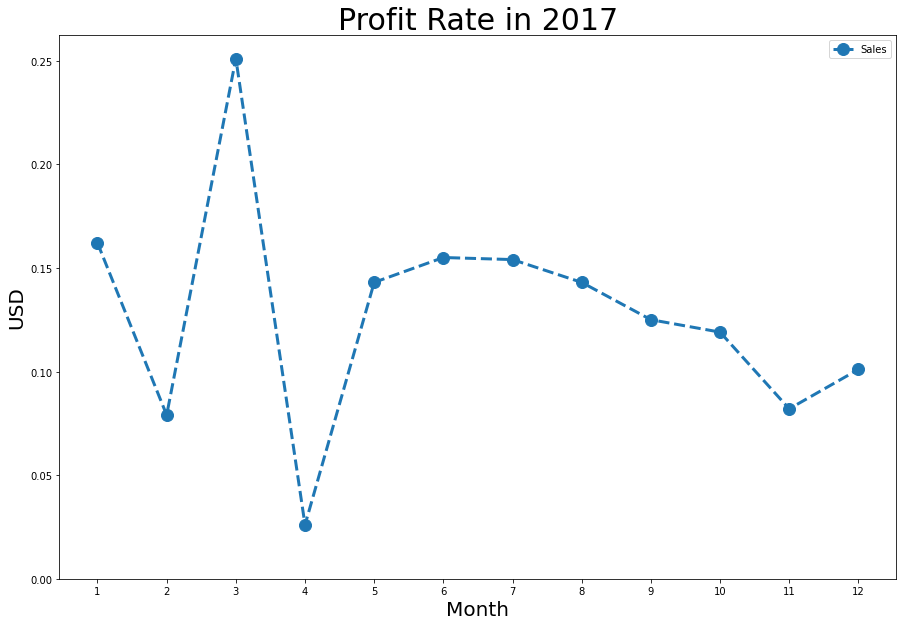

In [215]:
# Create line chart 
months = df_profit_sale_monthly.index.get_level_values('Order Month').unique().astype(str)
plt.figure(figsize=(15,10))
plt.plot(months, df_profit_sale_monthly[df_profit_sale_monthly.index.get_level_values('Order Year')==2017]['Profit Rate'], 
         marker='o', markersize=12,linewidth=3, linestyle='dashed', label = "Sales")
plt.xlabel("Month", fontsize=20)
plt.ylabel("USD", fontsize=20)
plt.ylim(ymin=0)
plt.title("Profit Rate in 2017", fontsize=30)
plt.savefig('../project_1/images/{}.png'.format('Profit Rate in 2017'), dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

In [271]:
import collections

In [274]:
collections.Counter(df_orders.loc[(df_orders['Order Year'] == 2017) & (df_orders['Discount'] >= 0.5)]['Order Month'])

Counter({12: 42,
         11: 41,
         4: 28,
         7: 16,
         6: 24,
         9: 37,
         3: 16,
         5: 25,
         1: 19,
         2: 13,
         10: 29,
         8: 13})

## 4.3. Compare the Profit Rate of States in 2017?

**Step 1:Get 2017 data and group dataframe by 'State',then Calculate Total of Profit, Sales**

In [135]:
df_profit_rate_states_2017 = df_orders_2017.groupby('State').sum()[['Sales', 'Profit']]

**Step 2: Add 'Profit Rate' column into df_profit_rate_states_2017**

In [136]:
df_profit_rate_states_2017['Profit Rate'] = round(df_profit_rate_states_2017['Profit']/df_profit_rate_states_2017['Sales'], 3)

In [247]:
df_profit_rate_states_2017 = df_profit_rate_states_2017.sort_values(by=['Profit Rate'],ascending=False)

In [250]:
df_profit_rate_states_2017

,Sales,Profit,Profit Rate
State,,,
District of Columbia,77.7600,35.0640,0.451
Delaware,13754.9830,6053.2049,0.440
Iowa,716.4100,275.8638,0.385
Minnesota,6728.2500,2459.8789,0.366
Kansas,733.1500,263.3644,0.359
Arkansas,2707.6400,959.4027,0.354
Montana,4229.2800,1465.9255,0.347
Mississippi,2997.2400,1028.5620,0.343
Georgia,19160.0200,6447.9819,0.337


**Step 3: Draw line chart Profit Rate 2017**

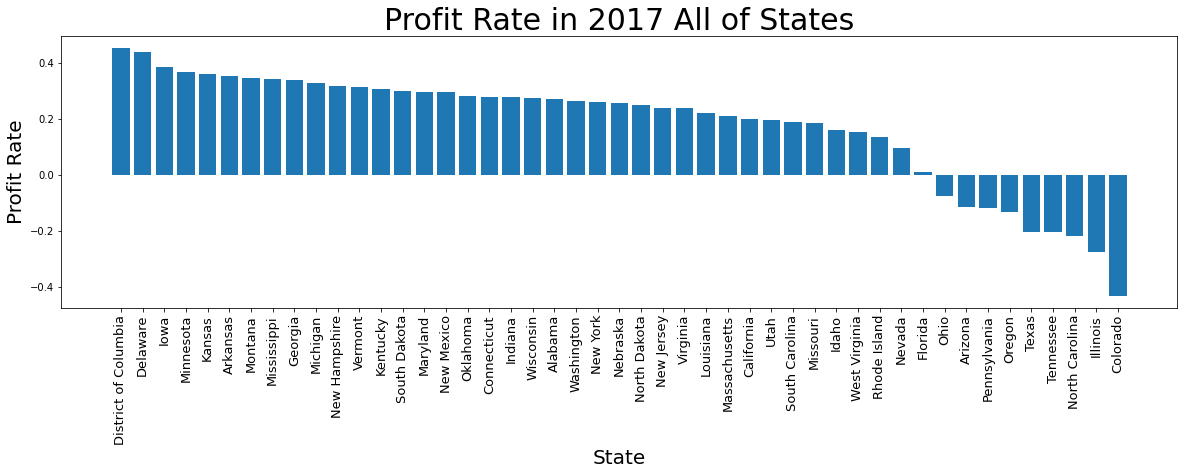

In [248]:
# Create bar chart 
states = df_profit_rate_states_2017.index.get_level_values('State').unique().astype(str)
plt.figure(figsize=(20,5))
plt.bar(states, df_profit_rate_states_2017['Profit Rate'])
plt.xticks(states, rotation=90, size=13)
plt.xlabel("State", fontsize=20)
plt.ylabel("Profit Rate", fontsize=20)
#plt.ylim(ymin=0)
plt.title("Profit Rate in 2017 All of States", fontsize=30)
plt.savefig('../project_1/images/{}.png'.format('Profit Rate in 2017 All of States'), dpi=300, bbox_inches='tight')
plt.show()

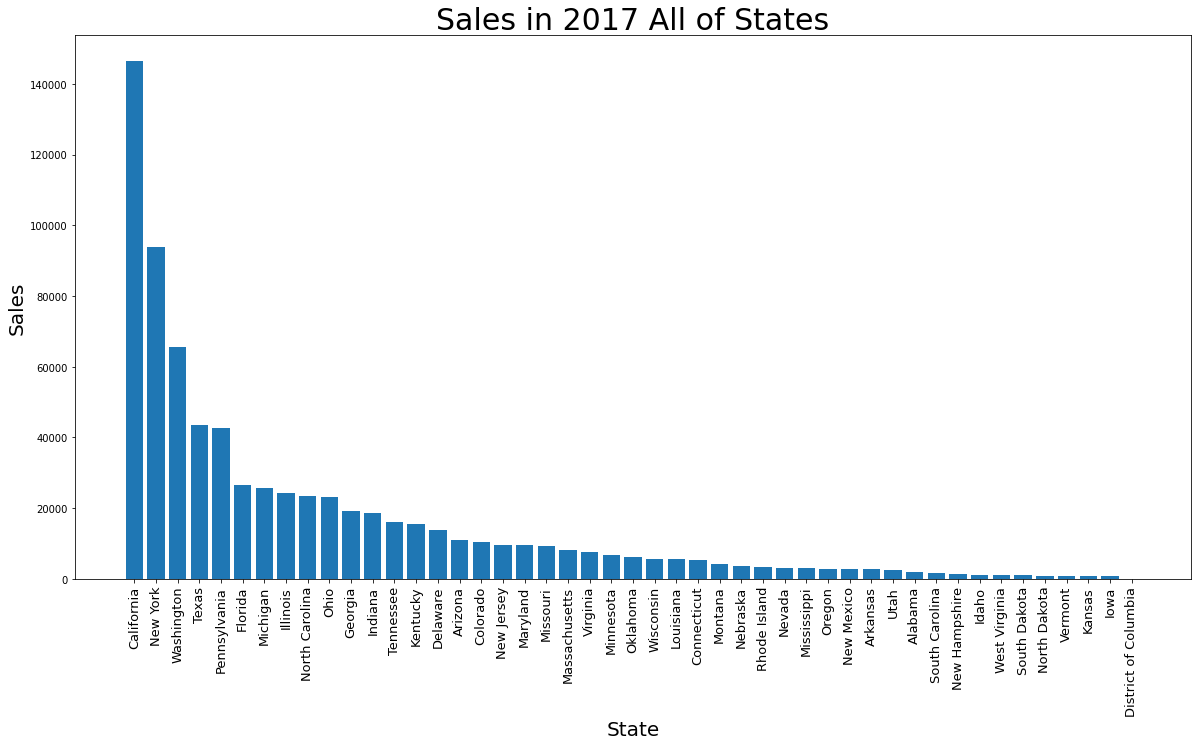

In [241]:
# Create bar chart 
states = list(df_profit_rate_states_2017.index.get_level_values('State').unique().astype(str))
plt.figure(figsize=(20,10))
plt.bar(states, df_profit_rate_states_2017['Sales'])
plt.xticks(states, rotation=90, size=13)
plt.xlabel("State", fontsize=20)
plt.ylabel("Sales", fontsize=20)
#plt.ylim(ymin=0)
plt.title("Sales in 2017 All of States", fontsize=30)
plt.show()

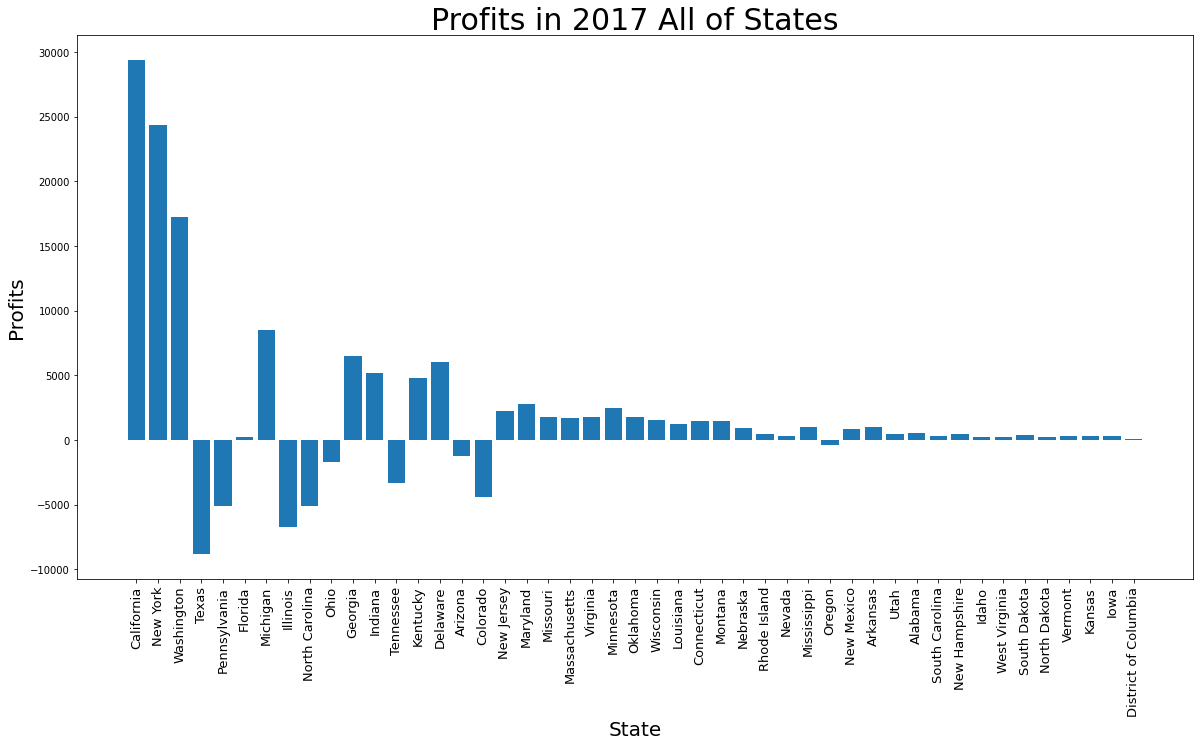

In [244]:
# Create bar chart 
states = list(df_profit_rate_states_2017.index.get_level_values('State').unique().astype(str))
plt.figure(figsize=(20,10))
plt.bar(states, df_profit_rate_states_2017['Profit'])
plt.xticks(states, rotation=90, size=13)
plt.xlabel("State", fontsize=20)
plt.ylabel("Profits", fontsize=20)
#plt.ylim(ymin=0)
plt.title("Profits in 2017 All of States", fontsize=30)
plt.show()

## 4.4. Which states and categories have the highest return rates?


#### For this question, we need information from 2 sources (df_orders and df_returns). 
**Step 1: Merge rows with the same Order IDmerge lines with the same id**

In [161]:
# Make a copy of df_orders and keep the duplicated rows
df_order_dup = df_orders[df_orders['Order ID'].duplicated(keep=False)]

In [ ]:
# Join all Sub-Category and Product Name with the same Order ID 
groupProduct = lambda product: ', '.join(product)
df_order_dup['all_sub_cate'] = df_order_dup.groupby('Order ID')['Sub-Category'].transform(groupProduct)
df_order_dup['all_products'] = df_order_dup.groupby('Order ID')['Product Name'].transform(groupProduct)

In [423]:
# Drop all duplicated rows
df_order_no_dup = df_order_dup.drop_duplicates('Order ID')

In [196]:
df_order_no_dup.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,returned,ordered,all_sub_cate,all_products
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,0,1,"Bookcases, Chairs","Bush Somerset Collection Bookcase, Hon Deluxe ..."
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,0,1,"Tables, Storage","Bretford CR4500 Series Slim Rectangular Table,..."
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,6,0,1,"Furnishings, Art, Phones, Binders, Appliances,...",Eldon Expressions Wood and Plastic Desk Access...
14,15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,76106,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,2015,11,0,1,"Appliances, Binders",Holmes Replacement Filter for HEPA Air Cleaner...
18,19,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,94109,West,OFF-AR-10003056,Office Supplies,Art,Newell 341,8.5600,2,0.00,2.4824,2014,8,1,1,"Art, Phones, Binders","Newell 341, Cisco SPA 501G IP Phone, Wilson Jo..."


**Step 2: Add 'returned' column with default value 0  and 'ordered' column with default value 1**

In [185]:
df_order_no_dup['returned']  = 0
df_order_no_dup['ordered'] = 1

**Step 3: Check the orders with the Order ID in df_order_dup match the Order ID in df_returns , will assign a value of 1 to the returned column**

In [186]:
for _, value in df_returns['Order ID'].iteritems():
    df_order_no_dup.loc[df_order_no_dup['Order ID'] == value, 'returned'] = 1

In [345]:
# Group dataframe with 'Category'
state_group_df = df_order_no_dup.groupby(['State']).sum()[['ordered','returned']]
# Add return_rate column in to dataframe
state_group_df['return_rate'] = round(state_group_df['returned']/state_group_df['ordered'], 3)
state_group_df_sorted = state_group_df['return_rate'].sort_values(ascending=False)

In [347]:
state_group_df_sorted

State
Montana                 0.250
Utah                    0.200
California              0.168
New Hampshire           0.167
Oregon                  0.161
Colorado                0.159
Idaho                   0.143
Washington              0.135
Delaware                0.115
Arizona                 0.115
New Mexico              0.111
Maryland                0.087
Massachusetts           0.083
Wisconsin               0.080
Rhode Island            0.077
Mississippi             0.077
Tennessee               0.068
Michigan                0.067
Georgia                 0.064
Alabama                 0.062
Texas                   0.059
Oklahoma                0.059
New York                0.056
Virginia                0.054
Ohio                    0.051
Illinois                0.050
Minnesota               0.042
Florida                 0.033
North Carolina          0.030
New Jersey              0.028
Kentucky                0.028
Pennsylvania            0.028
Iowa                    0.000
West

In [320]:
state_group_df_sorted.index.get_level_values('State').unique().astype(str).shape

(10,)

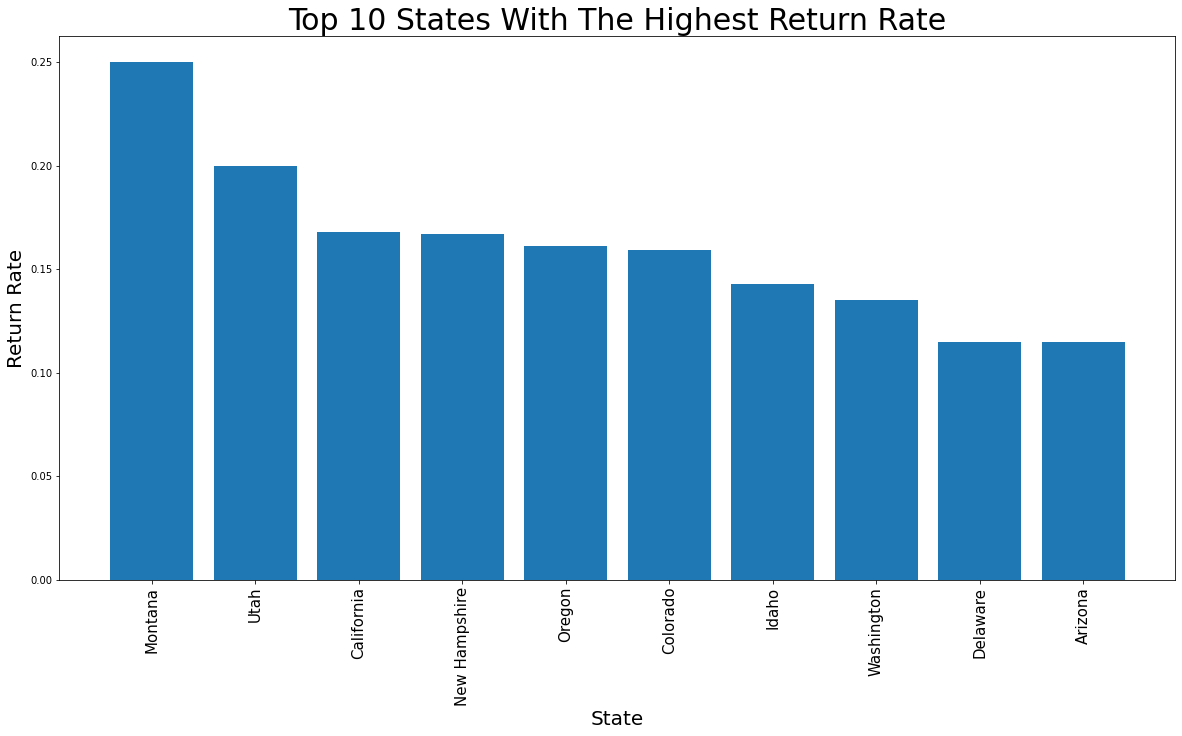

In [337]:
# Create bar chart 
states = state_group_df_sorted.index.get_level_values('State').unique().astype(str)
plt.figure(figsize=(20,10))
plt.bar(states, state_group_df_sorted)
plt.xticks(states, rotation=90, size=15)
plt.xlabel("State", fontsize=20)
plt.ylabel("Return Rate", fontsize=20)
plt.ylim(ymin=0)
plt.title("Top 10 States With The Highest Return Rate", fontsize=30)
plt.savefig('../project_1/images/{}.png'.format('Top 10 States With The Highest Return Rate'), dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Group dataframe with 'Category'
cate_group_df = df_order_no_dup.groupby(['Category']).sum()[['ordered','returned']]
# Add return_rate column in to dataframe
cate_group_df['return_rate'] = round(cate_group_df['returned']/cate_group_df['ordered'], 3)
cate_group_df_sorted = cate_group_df['return_rate'].sort_values(ascending=False)
cate_group_df_sorted

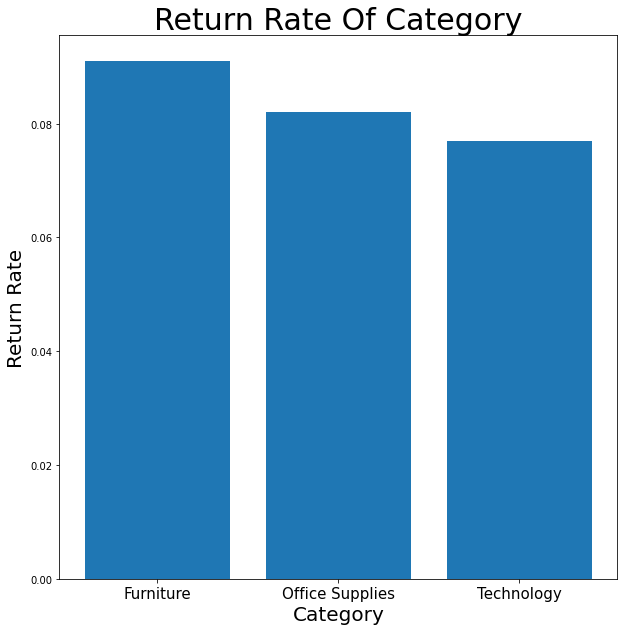

In [338]:
# Create bar chart 
cates = cate_group_df_sorted.index.get_level_values('Category').unique().astype(str)
plt.figure(figsize=(10,10))
plt.bar(cates, cate_group_df_sorted)
plt.xticks(cates, size=15)
plt.xlabel("Category", fontsize=20)
plt.ylabel("Return Rate", fontsize=20)
plt.ylim(ymin=0)
plt.title("Return Rate Of Category", fontsize=30)
plt.savefig('../project_1/images/{}.png'.format('Return Rate Of Category'), dpi=300, bbox_inches='tight')
plt.show()

In [286]:
# Group dataframe with 'State','Category'
group_df_order_no_dup = df_order_no_dup.groupby(['State','Category']).sum()[['ordered','returned']]
# Add return_rate column in to dataframe
group_df_order_no_dup['return_rate'] = round(group_df_order_no_dup['returned']/group_df_order_no_dup['ordered'], 3)

In [287]:
group_df_order_no_dup

ordered  returned  return_rate
State         Category                                       
Alabama       Furniture              2         0        0.000
              Office Supplies       11         0        0.000
              Technology             3         1        0.333
Arizona       Furniture             11         1        0.091
              Office Supplies       33         5        0.152
...                                ...       ...          ...
Washington    Technology            22         1        0.045
West Virginia Office Supplies        1         0        0.000
Wisconsin     Furniture              8         1        0.125
              Office Supplies       13         1        0.077
              Technology             4         0        0.000

[129 rows x 3 columns]

In [288]:
# Get state and category with the highest return rate
group_df_order_no_dup['return_rate'].idxmax()

('New Hampshire', 'Furniture')

In [289]:
# Get state and category with the lowest return rate
group_df_order_no_dup['return_rate'].idxmin()

('Alabama', 'Furniture')

## 4.5. Which month of the year has the most orders?

In [350]:
df_order_no_dup.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,returned,ordered,all_sub_cate,all_products
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,0,1,"Bookcases, Chairs","Bush Somerset Collection Bookcase, Hon Deluxe ..."
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,0,1,"Tables, Storage","Bretford CR4500 Series Slim Rectangular Table,..."


In [365]:
df_ord_quanities = df_order_no_dup.groupby(['Order Year', 'Order Month']).count()['Order ID']
df_ord_quanities.head()

Order Year  Order Month
2014        1              17
            2              11
            3              38
            4              38
            5              33
Name: Order ID, dtype: int64

In [355]:
years = df_ord_quanities.index.get_level_values('Order Year').unique().astype(str)
months = df_ord_quanities.index.get_level_values('Order Month').unique().astype(str)

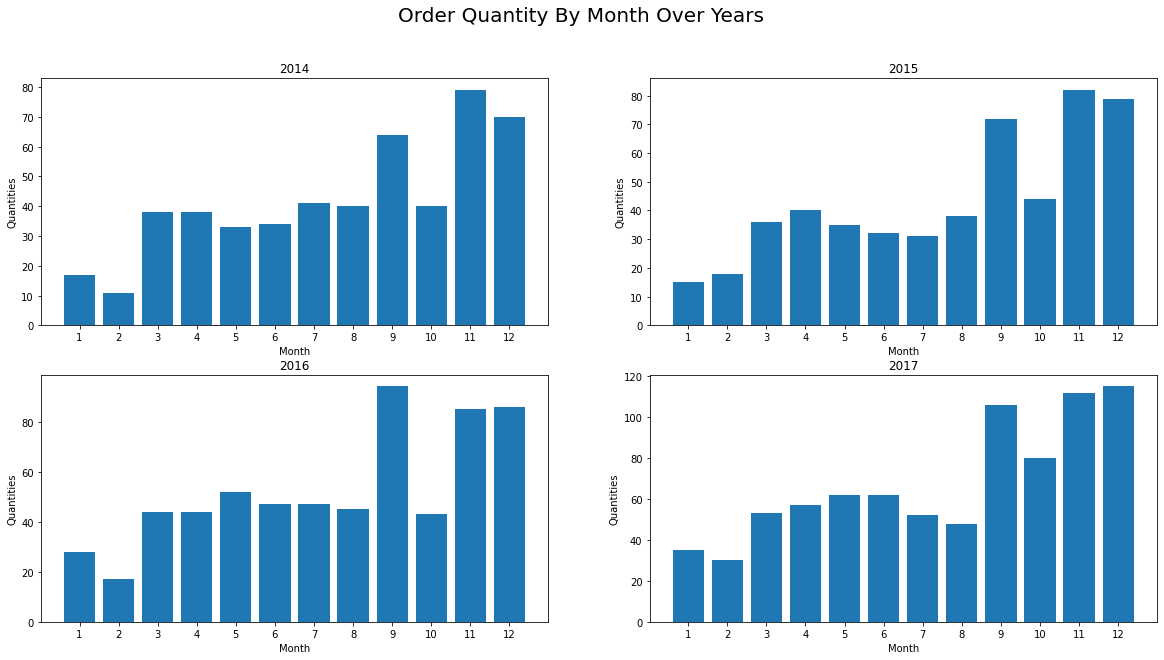

In [360]:
# Draw Order Quantity By Month Over Years chart 
fig = plt.figure(figsize=(20, 10), constrained_layout=False)
for i, year in enumerate(years):
    ax = fig.add_subplot(2, 2, i+1)
    ax.bar(months, df_ord_quanities[df_ord_quanities.index.get_level_values('Order Year')==int(years[i])])
    ax.set_title(years[i])
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantities')
fig.suptitle('Order Quantity By Month Over Years', fontsize=20)
plt.savefig('../project_1/images/{}.jpg'.format('Order Quantity By Month Over Years'), dpi=300, bbox_inches='tight')
# Combine all the operations and display
plt.show()


In [364]:
df_sales_month = df_order_no_dup.groupby(['Order Year', 'Order Month']).sum()['Sales']
df_sales_month.head()

Order Year  Order Month
2014        1               5083.188
            2                838.604
            3              11611.310
            4               6402.064
            5               7657.061
Name: Sales, dtype: float64

In [ ]:
years = df_sales_month.index.get_level_values('Order Year').unique().astype(str)
months = df_sales_month.index.get_level_values('Order Month').unique().astype(str)

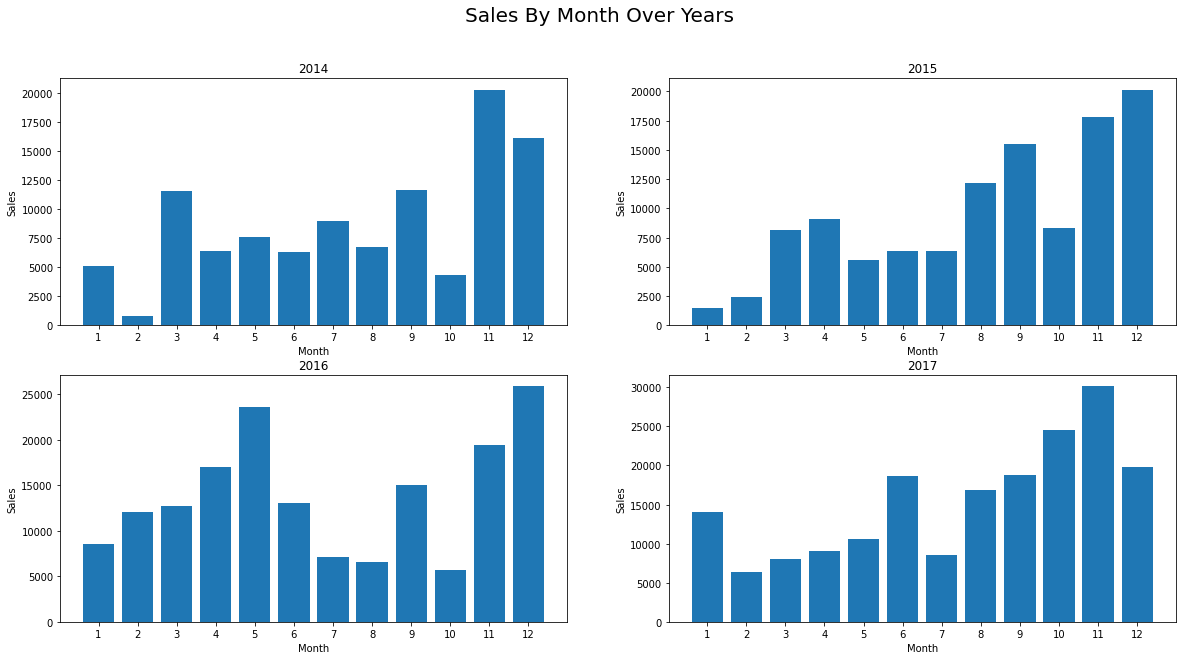

In [363]:
# Draw Sales By Month Over Years chart 
fig = plt.figure(figsize=(20, 10), constrained_layout=False)
for i, year in enumerate(years):
    ax = fig.add_subplot(2, 2, i+1)
    ax.bar(months, df_sales_month[df_sales_month.index.get_level_values('Order Year')==int(years[i])])
    ax.set_title(years[i])
    ax.set_xlabel('Month')
    ax.set_ylabel('Sales')
fig.suptitle('Sales By Month Over Years', fontsize=20)
plt.savefig('../project_1/images/{}.jpg'.format('Sales By Month Over Years'), dpi=300, bbox_inches='tight')
# Combine all the operations and display
plt.show()

## 4.6. Top 10 best-selling products 

In [376]:
group_products_df = df_orders.groupby(['Product Name']).sum()['Quantity'].sort_values(ascending=False).head(10)
group_products_df

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

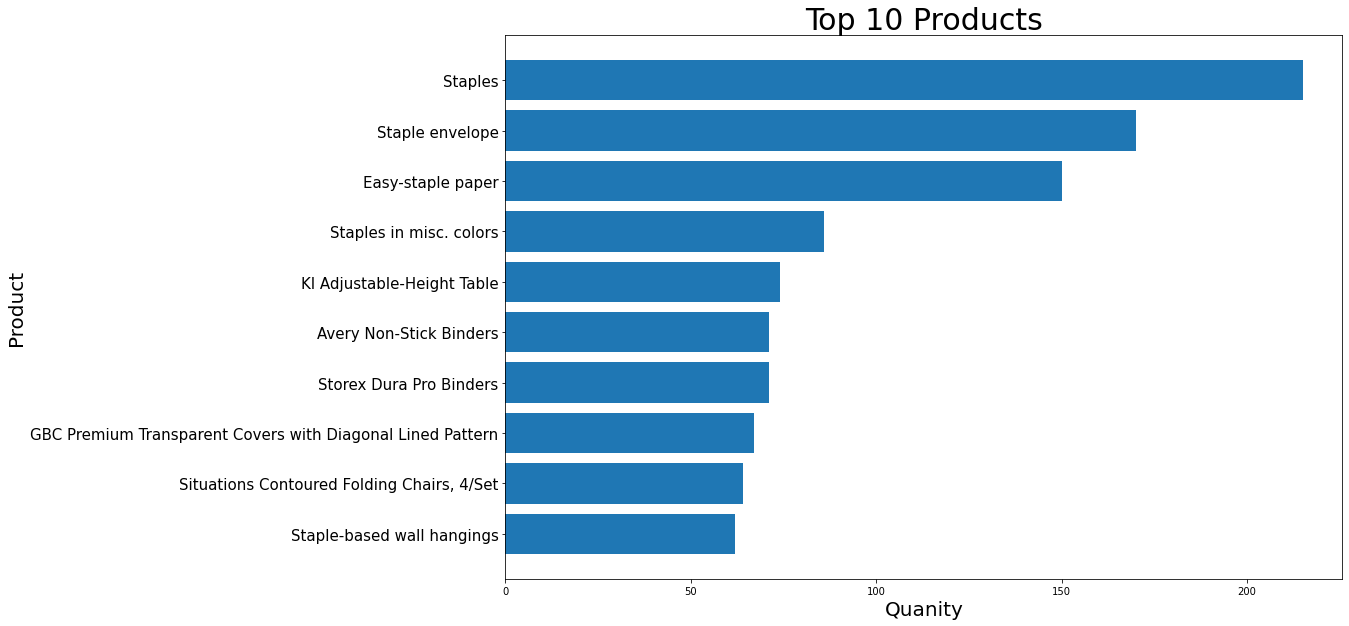

In [395]:
# Create bar chart 
product_names = group_products_df.index.get_level_values('Product Name').unique()
plt.figure(figsize=(15,10))
plt.barh(product_names, group_products_df)
plt.yticks(product_names, size=15)
plt.ylabel("Product", fontsize=20)
plt.xlabel("Quanity", fontsize=20)
plt.title("Top 10 Products", fontsize=30)
plt.gca().invert_yaxis()
plt.savefig('../project_1/images/{}.png'.format('Top 10 Products'), dpi=300, bbox_inches='tight')
plt.show()

## 4.7. Top 10 best-selling sub-category

In [422]:
group_sub_cate_df = df_orders.groupby(['Sub-Category']).sum()['Quantity'].sort_values(ascending=False).head(10)
group_sub_cate_df

Sub-Category
Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Name: Quantity, dtype: int64

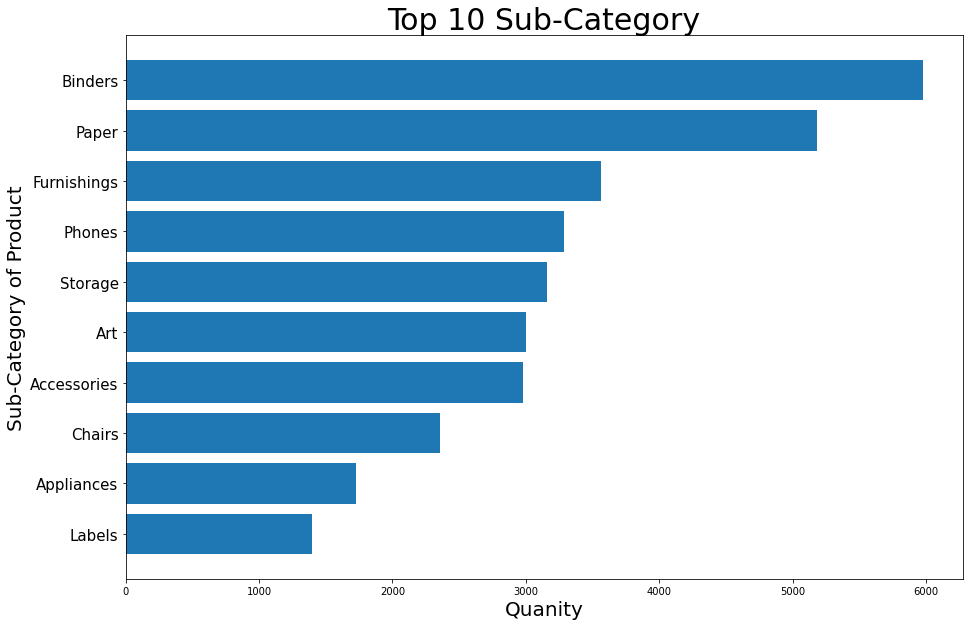

In [455]:
# Create bar chart 
sub_cate_names = group_sub_cate_df.index.get_level_values('Sub-Category').unique()
plt.figure(figsize=(15,10))
plt.barh(sub_cate_names, group_sub_cate_df)
plt.yticks(sub_cate_names, size=15)
plt.ylabel("Sub-Category of Product", fontsize=20)
plt.xlabel("Quanity", fontsize=20)
plt.title("Top 10 Sub-Category", fontsize=30)
plt.gca().invert_yaxis()
plt.savefig('../project_1/images/{}.png'.format('Top 10 Sub-Category'), dpi=300, bbox_inches='tight')
plt.show()

## Which sub-category are usually sold together?

In [453]:
top_10_pair_sell =  df_order_no_dup[['Category','all_sub_cate']].value_counts()

In [449]:
top_10_pair_sell = top_10_pair_sell.head(10).to_frame()


In [454]:
top_10_pair_sell

Category         all_sub_cate                                                                                     
Office Supplies  Paper, Binders                                                                                       29
                 Binders, Binders                                                                                     28
                 Binders, Paper                                                                                       28
                 Paper, Paper                                                                                         25
Furniture        Furnishings, Binders                                                                                 24
                                                                                                                      ..
Office Supplies  Binders, Accessories, Accessories, Art, Labels                                                        1
                 Art, Tables, Storage 

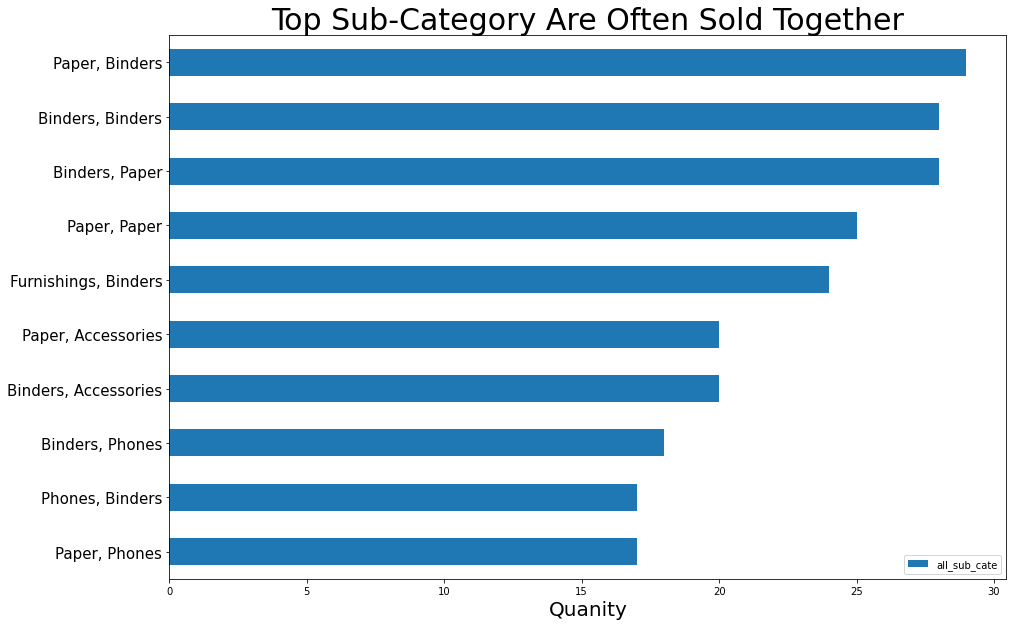

In [451]:
top_10_pair_sell.plot.barh(figsize=(15,10))
plt.yticks(size=15)
plt.ylabel("", fontsize=20)
plt.xlabel("Quanity", fontsize=20)
plt.title("Top Sub-Category Are Often Sold Together", fontsize=30)
plt.gca().invert_yaxis()
plt.savefig('../project_1/images/{}.png'.format('Top Sub-Category Are Often Sold Together'), dpi=300, bbox_inches='tight')
plt.show()